In [1]:
# 环境准备
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("● 本次任务：基于加州房价数据的精准预测")
print("✔ 环境准备完成，所有工具就绪")

● 本次任务：基于加州房价数据的精准预测
✔ 环境准备完成，所有工具就绪


In [2]:
# 任务理解预热
print("🏠 加州房价预测任务分析")
print("=" * 50)
print("数据集特点：")
print("• 20,640个加州街区样本")
print("• 8个关键特征 + 1个目标变量")
print("• 包含地理空间信息（经纬度）")
print("• 真实世界数据，具有实际应用价值")

print("\n预期流程：")
steps = [
    "1. 数据加载与理解",
    "2. 探索性数据分析(EDA)",
    "3. 地理空间可视化", 
    "4. 特征相关性分析",
    "5. 数据划分与预处理",
    "6. 模型训练与比较",
    "7. 模型评估与解释"
]

for step in steps:
    print(f"   {step}")

🏠 加州房价预测任务分析
数据集特点：
• 20,640个加州街区样本
• 8个关键特征 + 1个目标变量
• 包含地理空间信息（经纬度）
• 真实世界数据，具有实际应用价值

预期流程：
   1. 数据加载与理解
   2. 探索性数据分析(EDA)
   3. 地理空间可视化
   4. 特征相关性分析
   5. 数据划分与预处理
   6. 模型训练与比较
   7. 模型评估与解释


In [3]:
# 加载加州房价数据集
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

print("✅ 加州房价数据集加载成功")

print(f"\n=== 数据集基本信息 ===")
print(f"数据集形状: {df.shape}")
print(f"特征数量: {len(california.feature_names)}")
print(f"样本数量: {len(df)}")
print(f"目标变量: MedHouseVal (房价中位数，单位：十万美元)")

print("\n=== 特征详细说明 ===")
feature_descriptions = {
    'MedInc': '居民收入中位数',
    'HouseAge': '房屋年龄中位数', 
    'AveRooms': '平均房间数',
    'AveBedrms': '平均卧室数',
    'Population': '人口数量',
    'AveOccup': '平均入住率',
    'Latitude': '纬度',
    'Longitude': '经度'
}

for feature, description in feature_descriptions.items():
    print(f"• {feature}: {description}")

✅ 加州房价数据集加载成功

=== 数据集基本信息 ===
数据集形状: (20640, 9)
特征数量: 8
样本数量: 20640
目标变量: MedHouseVal (房价中位数，单位：十万美元)

=== 特征详细说明 ===
• MedInc: 居民收入中位数
• HouseAge: 房屋年龄中位数
• AveRooms: 平均房间数
• AveBedrms: 平均卧室数
• Population: 人口数量
• AveOccup: 平均入住率
• Latitude: 纬度
• Longitude: 经度


In [4]:
# 显示数据集的前几行
print("前5行数据:")
print(df.head())

print("\n数据集信息:")
print(df.info())

print("\n数值型特征的统计描述:")
print(df.describe())

# 检查数据质量
print(f"\n=== 数据质量检查 ===")
print(f"缺失值数量: {df.isnull().sum().sum()}")

print(f"\n目标变量统计:")
print(f"• 均值: ${df['MedHouseVal'].mean():.2f}万美元")
print(f"• 中位数: ${df['MedHouseVal'].median():.2f}万美元")
print(f"• 标准差: ${df['MedHouseVal'].std():.2f}万美元")
print(f"• 价格范围: ${df['MedHouseVal'].min():.2f}万 - ${df['MedHouseVal'].max():.2f}万美元")

前5行数据:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

数据集信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64


In [5]:
import matplotlib.font_manager as fm

# 查看系统可用字体
fonts = [f.name for f in fm.fontManager.ttflist]
chinese_fonts = [f for f in fonts if any(char in f for char in ['黑体', '宋体', '微软', 'Sim', 'Hei'])]
print("可用的中文字体:", chinese_fonts)

可用的中文字体: ['Heiti TC', 'Heiti TC']


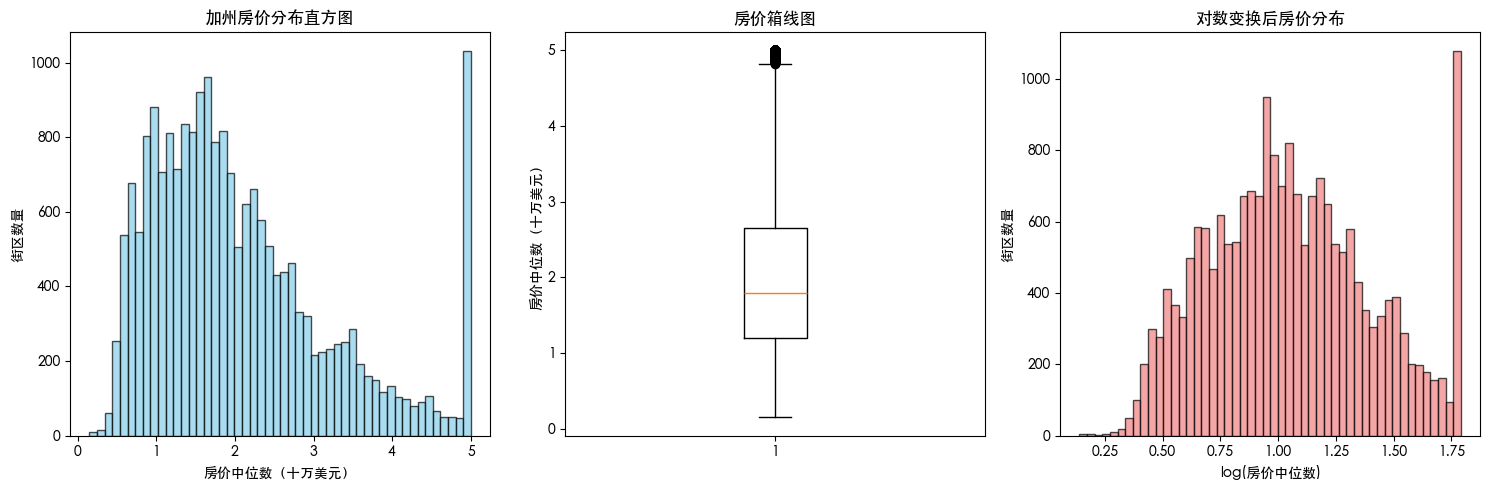

📊 目标变量分析:
• 偏度: 0.978 (接近正态)
• 峰度: 0.328


In [6]:
# 设置中文字体-黑体
plt.rcParams['font.sans-serif'] = ['Heiti TC']  
# 目标变量分布分析
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['MedHouseVal'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('加州房价分布直方图')
plt.xlabel('房价中位数（十万美元）')
plt.ylabel('街区数量')

plt.subplot(1, 3, 2)
plt.boxplot(df['MedHouseVal'])
plt.title('房价箱线图')
plt.ylabel('房价中位数（十万美元）')

plt.subplot(1, 3, 3)
# 价格的对数变换分析
log_price = np.log1p(df['MedHouseVal'])
plt.hist(log_price, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('对数变换后房价分布')
plt.xlabel('log(房价中位数)')
plt.ylabel('街区数量')

plt.tight_layout()
plt.show()

print("📊 目标变量分析:")
print(f"• 偏度: {df['MedHouseVal'].skew():.3f} ({'严重偏斜' if abs(df['MedHouseVal'].skew()) > 1 else '接近正态'})")
print(f"• 峰度: {df['MedHouseVal'].kurtosis():.3f}")

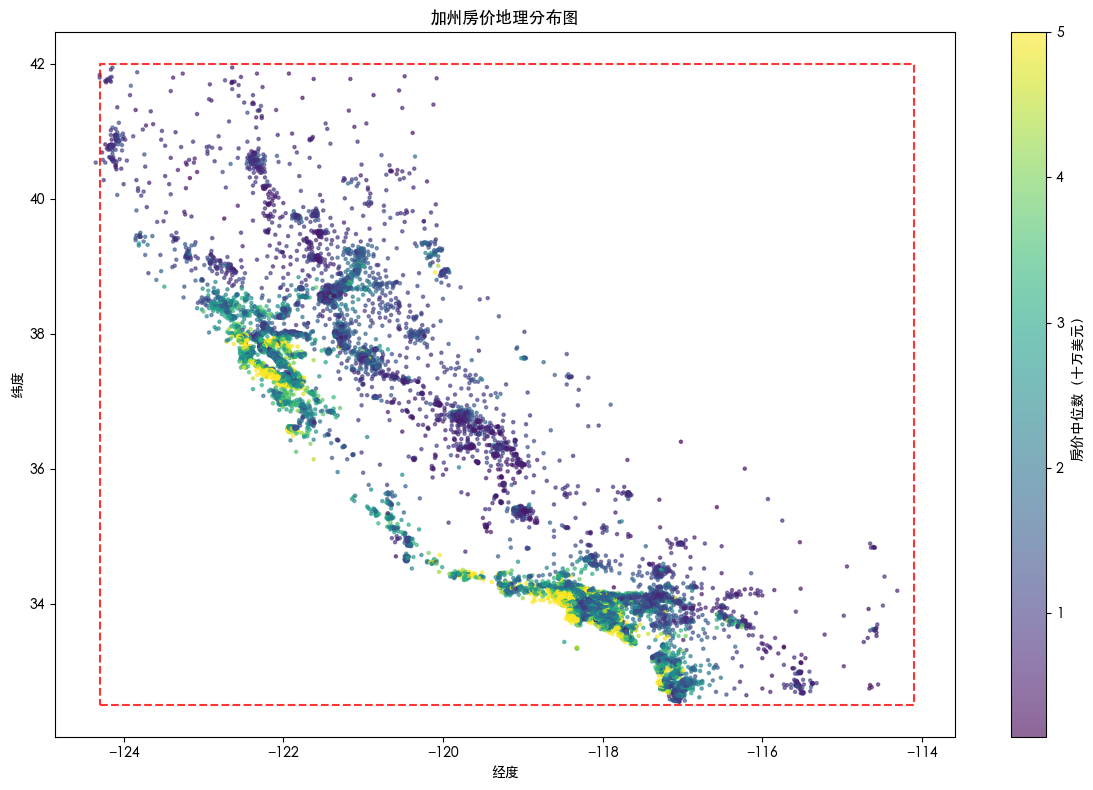

🌍 地理分布观察:
• 沿海地区（特别是湾区）房价明显更高
• 内陆地区房价相对较低
• 经纬度特征可能对房价预测很重要


In [7]:
# 加州地图上的房价分布
plt.figure(figsize=(12, 8))

# 创建散点图，颜色表示房价
scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                     c=df['MedHouseVal'], cmap='viridis', 
                     alpha=0.6, s=5)
plt.colorbar(scatter, label='房价中位数（十万美元）')
plt.xlabel('经度')
plt.ylabel('纬度')
plt.title('加州房价地理分布图')

# 添加加州轮廓示意
plt.plot([-124.3, -114.1, -114.1, -124.3, -124.3], 
         [32.5, 32.5, 42.0, 42.0, 32.5], 'r--', alpha=0.8)

plt.tight_layout()
plt.show()

print("🌍 地理分布观察:")
print("• 沿海地区（特别是湾区）房价明显更高")
print("• 内陆地区房价相对较低")
print("• 经纬度特征可能对房价预测很重要")

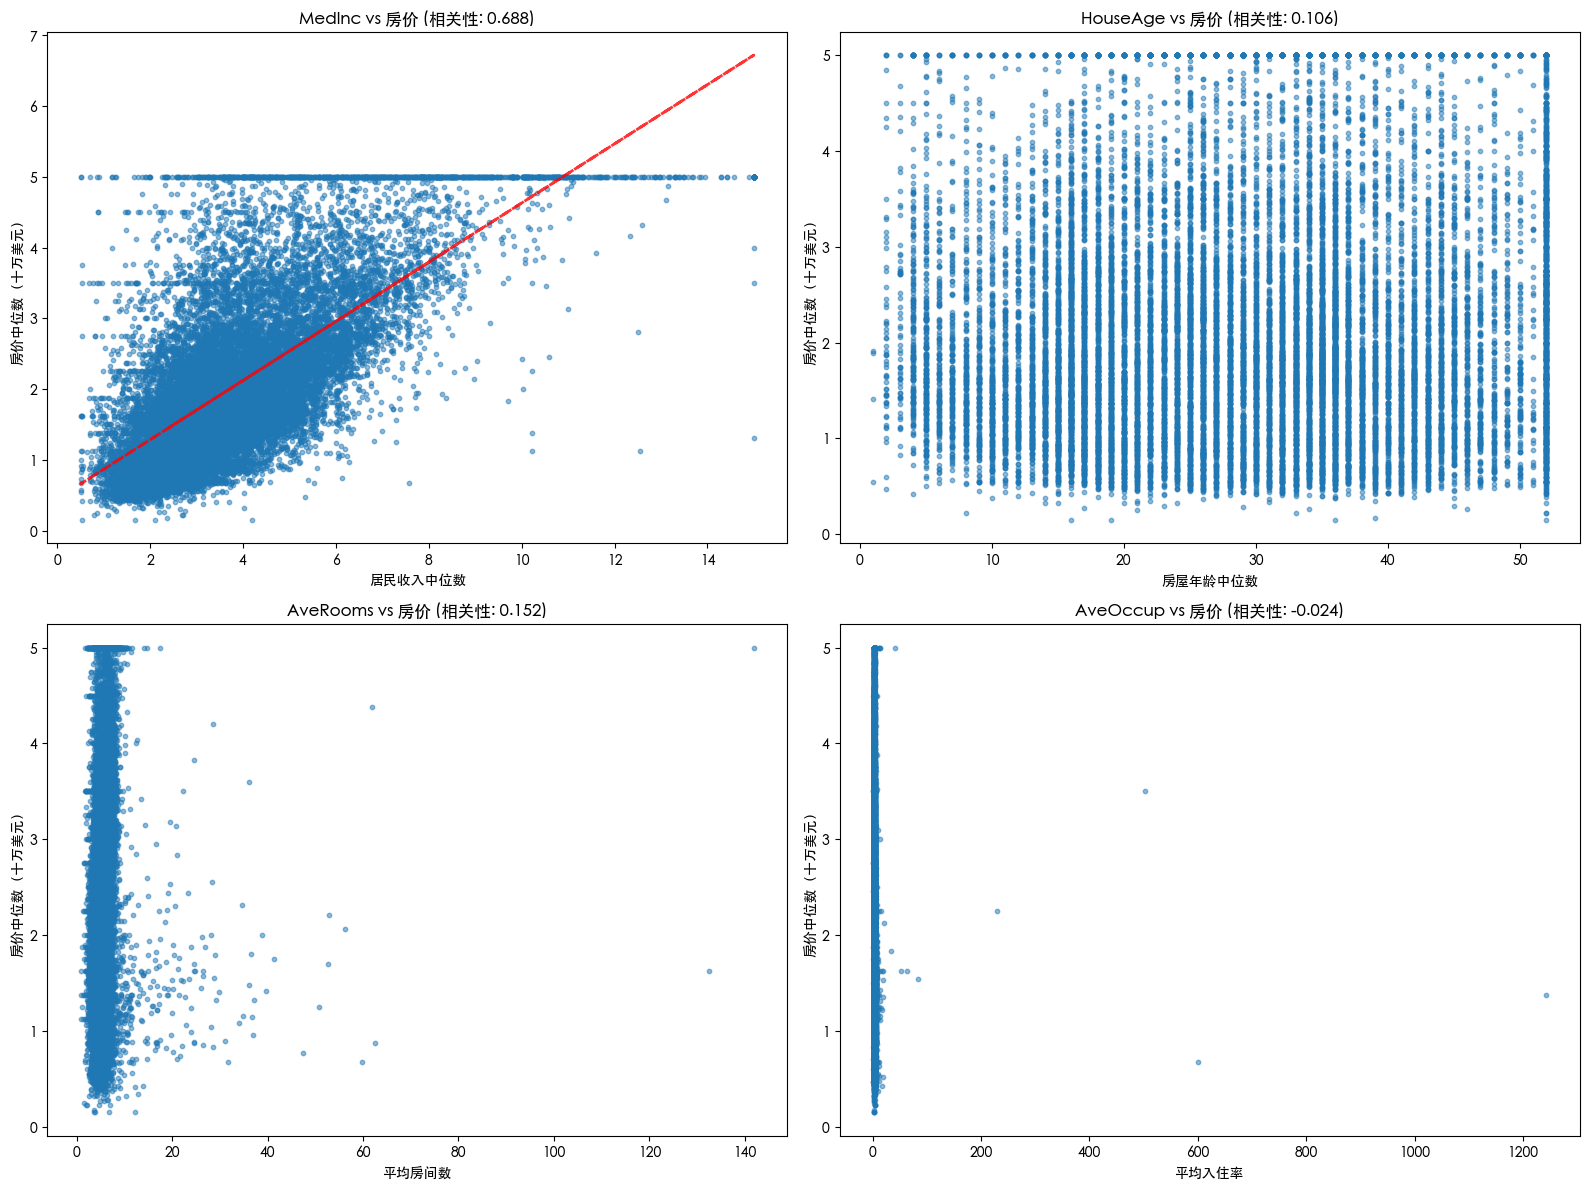

In [8]:
# 选择关键特征进行分析
key_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    
    plt.scatter(df[feature], df['MedHouseVal'], alpha=0.5, s=10)
    plt.xlabel(feature_descriptions[feature])
    plt.ylabel('房价中位数（十万美元）')
    
    # 计算相关系数
    corr = df[feature].corr(df['MedHouseVal'])
    plt.title(f'{feature} vs 房价 (相关性: {corr:.3f})')
    
    # 添加趋势线
    if corr > 0.3:  # 只有较强相关性才添加趋势线
        z = np.polyfit(df[feature], df['MedHouseVal'], 1)
        p = np.poly1d(z)
        plt.plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

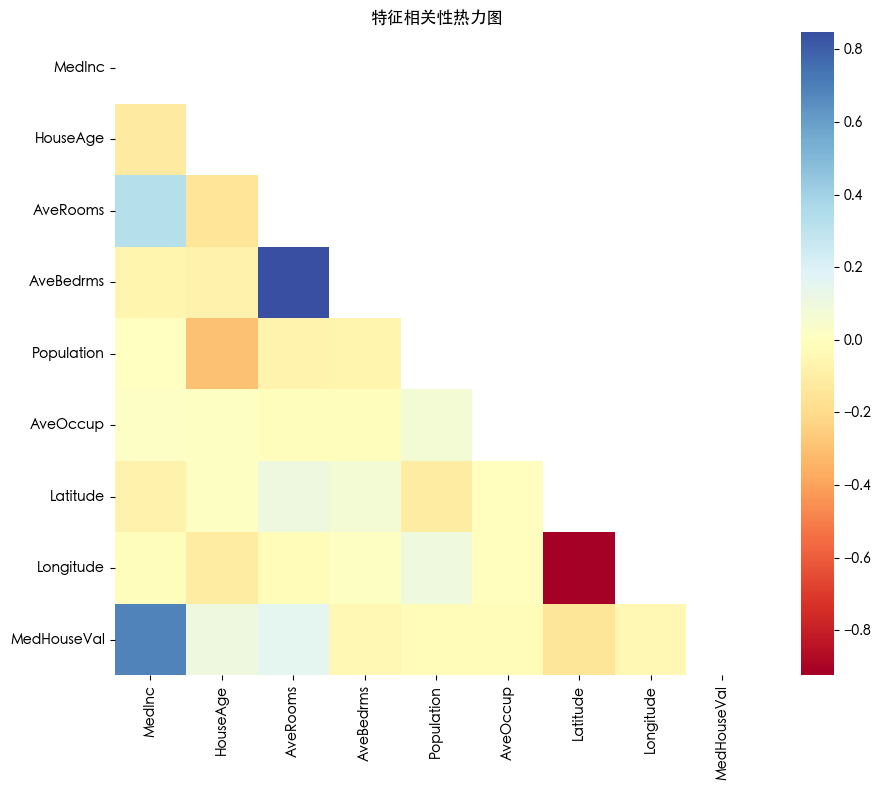

🔗 特征相关性分析:
与房价最相关的特征 (绝对值排序):
• MedInc: 0.688 (正相关) - 居民收入中位数
• AveRooms: 0.152 (正相关) - 平均房间数
• Latitude: -0.144 (负相关) - 纬度
• HouseAge: 0.106 (正相关) - 房屋年龄中位数
• AveBedrms: -0.047 (负相关) - 平均卧室数


In [9]:
# 创建图形窗口，设置尺寸为10x8英寸
plt.figure(figsize=(10, 8))

# 计算数据框中所有数值型特征之间的相关系数矩阵
# 相关系数衡量的是两个变量之间的线性关系强度和方向
correlation_matrix = df.corr()

# 创建上三角掩码，用于隐藏热力图上三角部分（包括对角线）
# 这样可以避免重复显示对称的信息，使图表更清晰
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 使用seaborn绘制热力图
sns.heatmap(
    correlation_matrix,  # 相关系数矩阵数据
    mask=mask,           # 应用上三角掩码
    annot=True,          # 在热力图上显示数值
    cmap='RdYlBu',       # 使用红-黄-蓝颜色映射：红色表示正相关，蓝色表示负相关
    center=0,            # 颜色中心点为0（相关系数为0）
    square=True,         # 每个单元格为正方形
    fmt='.2f'            # 数值格式化为保留两位小数
)

# 设置图表标题
plt.title('特征相关性热力图')
# 自动调整子图参数，使图形元素不重叠
plt.tight_layout()
# 显示图形
plt.show()

# 打印相关性分析结果
print("🔗 特征相关性分析:")
print("与房价最相关的特征 (绝对值排序):")

# 计算与房价的相关性，去掉房价自身，按绝对值从大到小排序
price_correlations = correlation_matrix['MedHouseVal'].drop('MedHouseVal').abs().sort_values(ascending=False)

# 遍历前5个最相关的特征
for feature, corr_abs in price_correlations.head(5).items():
    # 获取实际相关系数值（带符号）
    actual_corr = correlation_matrix.loc[feature, 'MedHouseVal']
    # 判断相关性方向
    direction = "正相关" if actual_corr > 0 else "负相关"
    # 打印特征名称、相关系数、方向说明和特征描述
    print(f"• {feature}: {actual_corr:.3f} ({direction}) - {feature_descriptions[feature]}")

In [10]:
# 准备特征和目标变量
# 从DataFrame中分离特征和目标变量
# X包含所有特征（删除目标列MedHouseVal）
X = df.drop('MedHouseVal', axis=1)
# y是目标变量，即我们要预测的房价中位数
y = df['MedHouseVal']

# 打印数据预处理信息
print("=== 数据预处理 ===")
print(f"特征矩阵形状: {X.shape}")  # 显示特征数据的维度（样本数×特征数）
print(f"目标向量形状: {y.shape}")  # 显示目标变量的维度

# 检查并处理异常值
print("\n=== 异常值检查 ===")
# 遍历每个特征列进行异常值检测
for feature in X.columns:
    # 计算第一四分位数（25%分位数）
    Q1 = X[feature].quantile(0.25)
    # 计算第三四分位数（75%分位数）
    Q3 = X[feature].quantile(0.75)
    # 计算四分位距（IQR）= Q3 - Q1
    IQR = Q3 - Q1
    # 使用IQR方法检测异常值：低于Q1-1.5IQR或高于Q3+1.5IQR的值被视为异常值
    outliers = ((X[feature] < (Q1 - 1.5 * IQR)) | (X[feature] > (Q3 + 1.5 * IQR))).sum()
    # 如果有异常值，打印相关信息
    if outliers > 0:
        print(f"⚠  {feature}: {outliers}个异常值 ({outliers/len(X)*100:.1f}%)")

# 数据标准化
# 使用StandardScaler对特征进行标准化（使均值为0，标准差为1）
scaler = StandardScaler()
# 对特征数据进行拟合和转换
X_scaled = scaler.fit_transform(X)

# 打印标准化完成信息
print(f"\n✅ 特征标准化完成")
# 显示标准化后数据的范围
print(f"标准化后特征范围: [{X_scaled.min():.2f}, {X_scaled.max():.2f}]")

=== 数据预处理 ===
特征矩阵形状: (20640, 8)
目标向量形状: (20640,)

=== 异常值检查 ===
⚠  MedInc: 681个异常值 (3.3%)
⚠  AveRooms: 511个异常值 (2.5%)
⚠  AveBedrms: 1424个异常值 (6.9%)
⚠  Population: 1196个异常值 (5.8%)
⚠  AveOccup: 711个异常值 (3.4%)

✅ 特征标准化完成
标准化后特征范围: [-2.39, 119.42]


In [11]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42,
    shuffle=True
)

print("=== 数据划分结果 ===")
print(f"训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")
print(f"训练集价格范围: ${y_train.min():.2f}万 - ${y_train.max():.2f}万美元")
print(f"测试集价格范围: ${y_test.min():.2f}万 - ${y_test.max():.2f}万美元")

print(f"\n数据划分策略说明:")
print("• 测试集比例: 20% - 保证足够数据训练同时充分测试")
print("• 随机种子: 42 - 确保结果可重现")
print("• 洗牌: 是 - 确保数据分布均匀")

=== 数据划分结果 ===
训练集大小: (16512, 8)
测试集大小: (4128, 8)
训练集价格范围: $0.15万 - $5.00万美元
测试集价格范围: $0.15万 - $5.00万美元

数据划分策略说明:
• 测试集比例: 20% - 保证足够数据训练同时充分测试
• 随机种子: 42 - 确保结果可重现
• 洗牌: 是 - 确保数据分布均匀


In [12]:
# 定义多个回归模型进行比较
# 使用字典存储不同模型，便于循环训练和比较
models = {
    "线性回归": LinearRegression(),
    "随机森林": RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
}

# 创建空字典用于存储所有模型的评估结果
results = {}

print("=== 模型训练开始 ===")
# 循环遍历每个模型进行训练和评估
for name, model in models.items():
    print(f"\n🎯 训练 {name}...")
    
    # 使用训练数据拟合模型
    model.fit(X_train, y_train)
    
    # 对训练集和测试集进行预测
    y_train_pred = model.predict(X_train)  # 训练集预测
    y_test_pred = model.predict(X_test)    # 测试集预测
    
    # ==================== 计算评估指标 ====================
    
    # 1. 计算均方根误差 (RMSE)
    # RMSE = sqrt(平均(预测值-真实值)^2)
    # 衡量预测值与真实值的平均偏差，单位与目标变量相同
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # 2. 计算平均绝对误差 (MAE)
    # MAE = 平均|预测值-真实值|
    # 对异常值不如RMSE敏感，更稳健的指标
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # 3. 计算决定系数 (R²)
    # R² = 1 - (残差平方和/总平方和)
    # 表示模型解释的目标变量方差比例
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # 存储当前模型的所有结果
    results[name] = {
        'model': model,           # 训练好的模型对象
        'train_rmse': train_rmse, # 训练集RMSE
        'test_rmse': test_rmse,   # 测试集RMSE
        'train_mae': train_mae,   # 训练集MAE
        'test_mae': test_mae,     # 测试集MAE
        'train_r2': train_r2,     # 训练集R²
        'test_r2': test_r2,       # 测试集R²
        'y_test_pred': y_test_pred # 测试集预测值
    }
    
    print(f"✅ 训练完成")
    print(f"📊 训练集 RMSE: ${train_rmse:.3f}万")  # 显示训练集RMSE（单位：万美元）
    print(f"📊 测试集 RMSE: ${test_rmse:.3f}万")   # 显示测试集RMSE
    print(f"📊 训练集 MAE: ${train_mae:.3f}万")    # 显示训练集MAE
    print(f"📊 测试集 MAE: ${test_mae:.3f}万")     # 显示测试集MAE
    print(f"📈 训练集 R²: {train_r2:.4f}")         # 显示训练集R²
    print(f"📈 测试集 R²: {test_r2:.4f}")          # 显示测试集R²

=== 模型训练开始 ===

🎯 训练 线性回归...
✅ 训练完成
📊 训练集 RMSE: $0.720万
📊 测试集 RMSE: $0.746万
📊 训练集 MAE: $0.529万
📊 测试集 MAE: $0.533万
📈 训练集 R²: 0.6126
📈 测试集 R²: 0.5758

🎯 训练 随机森林...
✅ 训练完成
📊 训练集 RMSE: $0.414万
📊 测试集 RMSE: $0.545万
📊 训练集 MAE: $0.292万
📊 测试集 MAE: $0.366万
📈 训练集 R²: 0.8719
📈 测试集 R²: 0.7737


In [13]:
# 比较模型性能
print("\n" + "="*60)
print("🏆 模型性能比较")
print("="*60)
print(f"{'模型':<12} {'测试RMSE':<10} {'测试MAE':<10} {'测试R²':<8} {'过拟合指数'}")
print("-"*60)

best_model_name = None
best_score = float('inf')

for name, result in results.items():
    test_rmse = result['test_rmse']
    test_mae = result['test_mae']
    test_r2 = result['test_r2']
    overfit_ratio = result['train_rmse'] / result['test_rmse']
    
    print(f"{name:<12} ${test_rmse:<8.3f}万 ${test_mae:<8.3f}万 {test_r2:<8.4f} {overfit_ratio:.3f}")
    
    if test_rmse < best_score:
        best_score = test_rmse
        best_model_name = name
        
best_model = results[best_model_name]['model']
print(f"\n🎯 最佳模型: {best_model_name}")
print(f"📊 测试集RMSE: ${best_score:.3f}万美元")
print(f"💡 这意味着平均预测误差约为${best_score*10000:.0f}美元")

# 解释评估指标
print(f"\n📋 评估指标解读:")
print("• RMSE(均方根误差): 对较大误差惩罚更重")
print("• MAE(平均绝对误差): 更直观的误差理解")  
print("• R²(决定系数): 模型解释目标变量变化的比例")
print("• 过拟合指数: 越接近1越好，<0.9可能欠拟合，>1.1可能过拟合")


🏆 模型性能比较
模型           测试RMSE     测试MAE      测试R²     过拟合指数
------------------------------------------------------------
线性回归         $0.746   万 $0.533   万 0.5758   0.965
随机森林         $0.545   万 $0.366   万 0.7737   0.760

🎯 最佳模型: 随机森林
📊 测试集RMSE: $0.545万美元
💡 这意味着平均预测误差约为$5445美元

📋 评估指标解读:
• RMSE(均方根误差): 对较大误差惩罚更重
• MAE(平均绝对误差): 更直观的误差理解
• R²(决定系数): 模型解释目标变量变化的比例
• 过拟合指数: 越接近1越好，<0.9可能欠拟合，>1.1可能过拟合



=== 特征重要性分析 ===


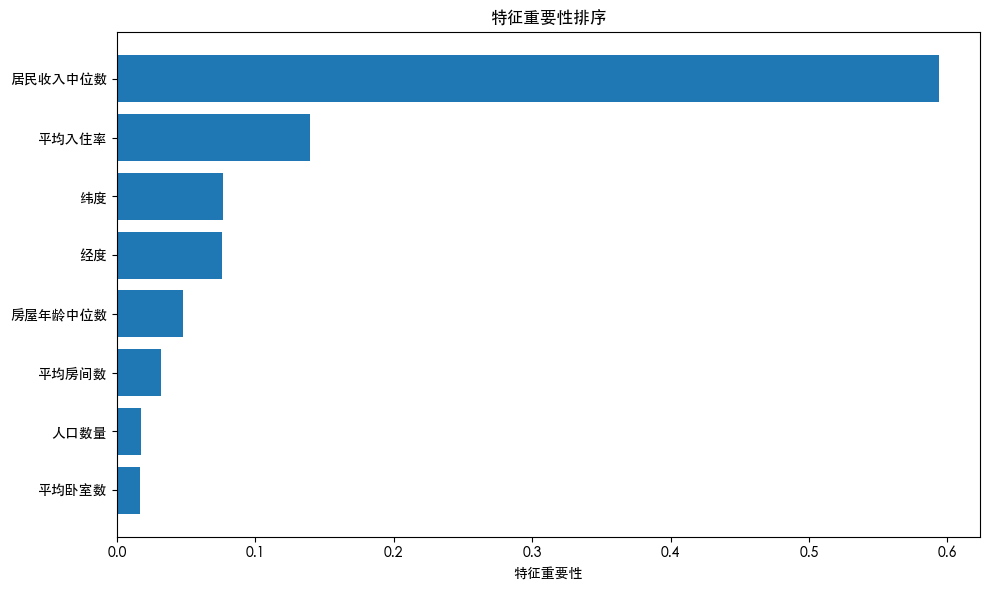

📊 特征重要性排名:
 1. 居民收入中位数         重要性: 0.5939
 6. 平均入住率           重要性: 0.1398
 7. 纬度              重要性: 0.0766
 8. 经度              重要性: 0.0761
 2. 房屋年龄中位数         重要性: 0.0479
 3. 平均房间数           重要性: 0.0316
 5. 人口数量            重要性: 0.0172
 4. 平均卧室数           重要性: 0.0171

💡 业务洞察:
• 最重要的特征: 居民收入中位数
• 这表明居民收入中位数对房价影响最大


In [17]:
# 分析特征重要性
print("\n=== 特征重要性分析 ===")

if hasattr(best_model, 'feature_importances_'):
    # 树模型的特征重要性
    feature_importance = best_model.feature_importances_
else:
    # 线性模型的系数绝对值作为重要性
    feature_importance = np.abs(best_model.coef_)

feature_importance_df = pd.DataFrame({
    'feature': california.feature_names,
    'importance': feature_importance,
    'description': [feature_descriptions[feature] for feature in california.feature_names]
}).sort_values('importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['description'], feature_importance_df['importance'])
plt.xlabel('特征重要性')
plt.title('特征重要性排序')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("📊 特征重要性排名:")
for i, row in feature_importance_df.iterrows():
    print(f"{i+1:2d}. {row['description']:15} 重要性: {row['importance']:.4f}")

print(f"\n💡 业务洞察:")
top_feature = feature_importance_df.iloc[0]
print(f"• 最重要的特征: {top_feature['description']}")
print(f"• 这表明{top_feature['description']}对房价影响最大")

In [14]:
# 使用最佳模型进行预测演示
print("🔮 模型应用演示")

# 创建几个虚拟的加州街区数据进行预测
new_neighborhoods = [
    # [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]
    [8.0, 25, 6, 1.2, 1200, 2.5, 34.05, -118.24],  # 洛杉矶地区
    [3.0, 15, 4, 1.0, 800, 3.0, 36.78, -119.72],   # 弗雷斯诺地区
    [12.0, 35, 8, 1.5, 600, 2.0, 37.77, -122.41],  # 旧金山地区
]

neighborhood_descriptions = [
    "洛杉矶中等收入街区",
    "中央山谷经济实惠区", 
    "旧金山高端住宅区"
]

print("\n=== 新街区房价预测 ===")
for i, (features, description) in enumerate(zip(new_neighborhoods, neighborhood_descriptions), 1):
    # 标准化特征
    features_scaled = scaler.transform([features])
    
    # 预测价格
    predicted_price = best_model.predict(features_scaled)[0]
    
    print(f"\n🏠 {description}:")
    print(f"   特征: 收入${features[0]:.1f}万, 房龄{features[1]}年, {features[2]}间房")
    print(f"   位置: 纬度{features[6]}, 经度{features[7]}")
    print(f"   📈 预测房价: ${predicted_price:.2f}万美元")
    print(f"   💰 约合人民币: ¥{predicted_price*7:.0f}万元")  # 假设汇率7

print(f"\n💡 预测说明:")
print("• 这些是基于模型学习的规律进行的预测")
print("• 实际房价还受市场供需、政策等因素影响")
print("• 模型在训练数据范围内预测更可靠")

🔮 模型应用演示

=== 新街区房价预测 ===

🏠 洛杉矶中等收入街区:
   特征: 收入$8.0万, 房龄25年, 6间房
   位置: 纬度34.05, 经度-118.24
   📈 预测房价: $4.67万美元
   💰 约合人民币: ¥33万元

🏠 中央山谷经济实惠区:
   特征: 收入$3.0万, 房龄15年, 4间房
   位置: 纬度36.78, 经度-119.72
   📈 预测房价: $1.33万美元
   💰 约合人民币: ¥9万元

🏠 旧金山高端住宅区:
   特征: 收入$12.0万, 房龄35年, 8间房
   位置: 纬度37.77, 经度-122.41
   📈 预测房价: $4.97万美元
   💰 约合人民币: ¥35万元

💡 预测说明:
• 这些是基于模型学习的规律进行的预测
• 实际房价还受市场供需、政策等因素影响
• 模型在训练数据范围内预测更可靠


In [15]:
print("\n" + "="*70)
print("🎯 加州房价预测完整流程总结")
print("="*70)

summary_steps = [
    ("1. 数据理解", "分析8个特征的地理和经济含义"),
    ("2. 探索分析", "可视化房价分布和地理模式"),
    ("3. 特征分析", "计算特征相关性和重要性"),
    ("4. 数据预处理", "标准化特征和划分数据集"),
    ("5. 模型训练", "比较不同回归算法性能"),
    ("6. 模型评估", "使用RMSE、MAE、R²多指标评估"),
    ("7. 结果解释", "分析特征重要性和业务洞察")
]

for step, description in summary_steps:
    print(f"{step:15} {description}")

best_result = results[best_model_name]
print(f"\n📊 最终模型表现:")
print(f"• 测试集RMSE: ${best_result['test_rmse']:.3f}万美元")
print(f"• 测试集MAE: ${best_result['test_mae']:.3f}万美元") 
print(f"• 测试集R²: {best_result['test_r2']:.4f}")

print(f"\n💡 关键收获:")
print("• 掌握了处理真实房价数据的完整机器学习流程")
print("• 学会了地理空间数据的可视化分析方法")
print("• 理解了回归问题的多维度评估指标")
print("• 建立了从数据到业务洞察的完整思维能力")


🎯 加州房价预测完整流程总结
1. 数据理解         分析8个特征的地理和经济含义
2. 探索分析         可视化房价分布和地理模式
3. 特征分析         计算特征相关性和重要性
4. 数据预处理        标准化特征和划分数据集
5. 模型训练         比较不同回归算法性能
6. 模型评估         使用RMSE、MAE、R²多指标评估
7. 结果解释         分析特征重要性和业务洞察

📊 最终模型表现:
• 测试集RMSE: $0.545万美元
• 测试集MAE: $0.366万美元
• 测试集R²: 0.7737

💡 关键收获:
• 掌握了处理真实房价数据的完整机器学习流程
• 学会了地理空间数据的可视化分析方法
• 理解了回归问题的多维度评估指标
• 建立了从数据到业务洞察的完整思维能力


In [16]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1)